In [1]:
### Visualization of Figure 1BCD

import numpy as np
import pandas as pd
from pycirclize import Circos
from io import StringIO
from matplotlib.patches import Patch
import pycountry
import pycirclize.utils
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
geoInfo = pd.read_csv('data/institutionGeo.csv')
print(geoInfo.shape)
geoInfo.head()

(108607, 8)


,institution_id,city,geonames_city_id,region,country_code,country,latitude,longitude
0,I100005738,Provo,5780026.0,Utah,US,United States,40.2500,-111.6500
1,I100019715,Canberra,2172517.0,Australian Capital Territory,AU,Australia,-35.3148,149.1310
2,I100051649,Nizhny Novgorod,520555.0,NaN,RU,Russia,56.3292,44.0095
3,I100060924,NaN,NaN,NaN,US,NaN,39.8263,-84.9101
4,I100063501,Brighton,2654710.0,NaN,GB,United Kingdom,50.8650,-0.0850


In [3]:
flow_data = pd.read_csv('data/flow_data_with_simulation.csv')
flow_data['originC'] = flow_data['origin'].map(dict(zip(geoInfo['institution_id'], geoInfo['country_code'])))
flow_data['destinationC'] = flow_data['destination'].map(dict(zip(geoInfo['institution_id'], geoInfo['country_code'])))
print(flow_data.shape)
flow_data.head()

(938282, 9)


,Unnamed: 0,origin,destination,time,number_of_movement,level_distance,Simulated_movement,originC,destinationC
0,0,I98677209,I28407311,1985-1989,2.0,1,0.346758,GB,GB
1,1,I98677209,I118347636,1985-1989,4.0,3,0.469802,GB,AU
2,2,I98677209,I99542240,1985-1989,1.0,2,0.199479,GB,PL
3,3,I98677209,I1294671590,1985-1989,2.0,2,2.908295,GB,FR
4,4,I98677209,I40120149,1985-1989,14.0,1,0.904182,GB,GB


In [4]:
flow_data['value'] = flow_data[['number_of_movement','Simulated_movement']].apply(lambda x: np.log(x['number_of_movement']/x['Simulated_movement']), axis =1)

In [5]:
flow_data['innercity'] = flow_data['level_distance'].map({
    0: 'inner',
    1: 'inter',
    2: 'inter',
    3: 'inter'
})
flow_data['innercountry'] = flow_data['level_distance'].map({
    0: 'inner',
    1: 'inner',
    2: 'inter',
    3: 'inter'
})
flow_data['innercontinent'] = flow_data['level_distance'].map({
    0: 'inner',
    1: 'inner',
    2: 'inner',
    3: 'inter'
})

In [6]:
figsize1 = (8, 6)

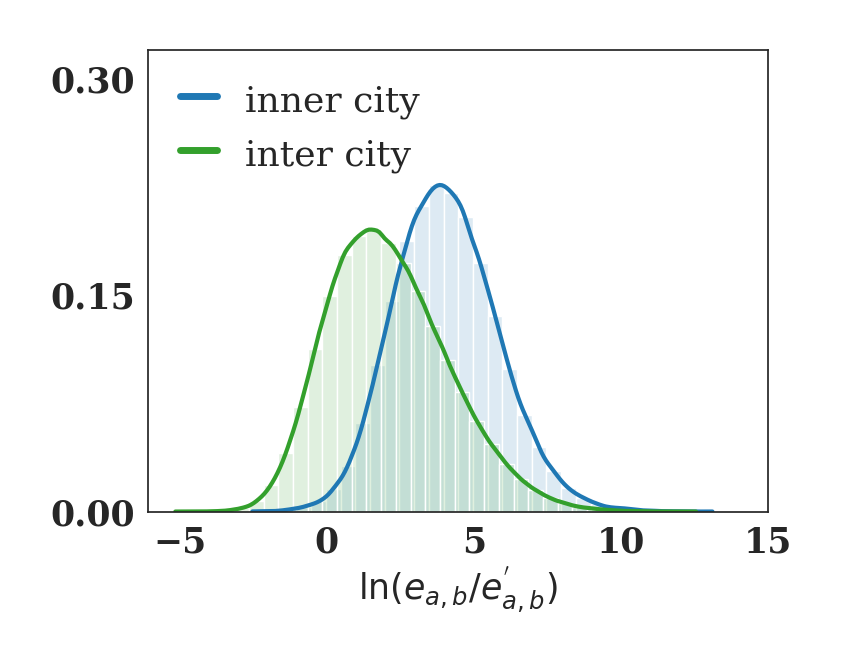

In [7]:
sns.set_theme(style='white')

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times New Roman']  # 可以具体替换
# plt.rc('mathtext', fontset='cm')

plt.figure(figsize=figsize1, dpi=100)
plt.ylim(0, 0.32)
flag = 'city'
# plt.ylabel(measures , fontsize = 20)
sns.histplot(x = 'value', kde=True, stat='density',binwidth=0.5, alpha = 0.15,line_kws={'linewidth': 3},
             data = flow_data[flow_data['inner'+flag] == 'inner'],
             color = '#1f78b4',
             label = 'inner '+flag)
sns.histplot(x = 'value', kde=True, stat='density',binwidth=0.5, alpha = 0.15,line_kws={'linewidth': 3},
             data = flow_data[flow_data['inner'+flag] =='inter'],
             color = '#33a02c',
             label = 'inter '+flag)
# plt.legend(loc = 'upper left', fontsize = 20)
plt.xticks( [-5,0,5,10,15], fontsize = 25, weight = 'bold')
plt.yticks([0,0.15,0.30], fontsize = 25, weight = 'bold')
plt.ylabel('', fontsize = 20, weight = 'bold')
plt.xlabel(r"$\ln (e_{a,b} / e_{a,b}^{'})$", fontsize = 25, weight = 'bold')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#1f78b4', lw=5, label='inner '+flag),
                   Line2D([0], [0], color='#33a02c', lw=5, label='inter '+flag)]

# 添加图例
plt.legend(handles=legend_elements, loc = 'upper left', fontsize=26)

# plt.tight_layout()
# plt.savefig('innerinterCityPDF.jpg')

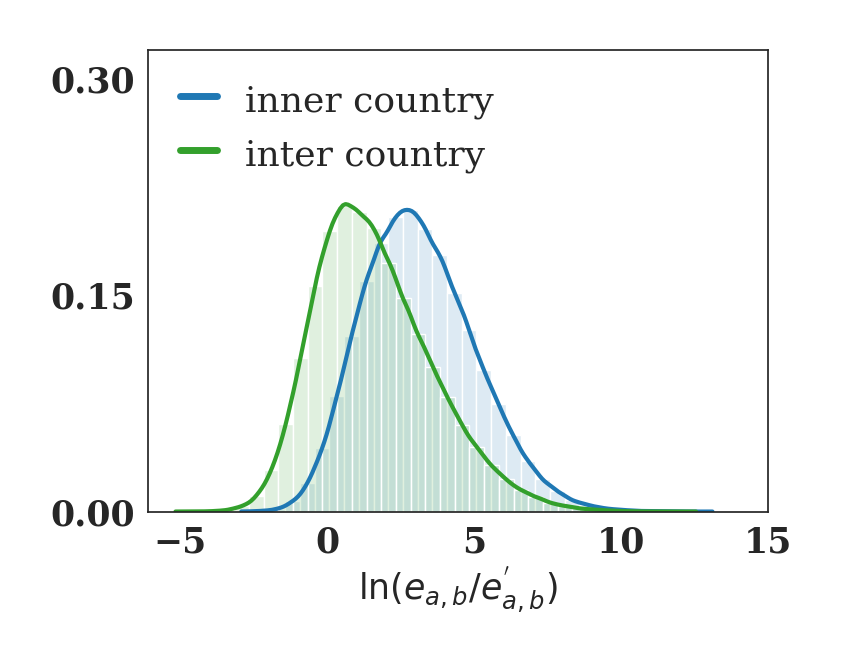

In [8]:
sns.set_theme(style='white')

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times New Roman']  # 可以具体替换
plt.figure(figsize=figsize1, dpi=100)
plt.ylim(0, 0.32)
flag = 'country'
# plt.ylabel(measures , fontsize = 20)
sns.histplot(x = 'value', kde=True, stat='density',binwidth=0.5, alpha = 0.15,line_kws={'linewidth': 3},
             data = flow_data[flow_data['inner'+flag] == 'inner'],
             color = '#1f78b4',
             label = 'inner '+flag)
sns.histplot(x = 'value', kde=True, stat='density',binwidth=0.5, alpha = 0.15,line_kws={'linewidth': 3},
             data = flow_data[flow_data['inner'+flag] =='inter'],
             color = '#33a02c',
             label = 'inter '+flag)
# plt.legend(loc = 'upper left', fontsize = 20)
plt.xticks( [-5,0,5,10,15], fontsize = 25, weight = 'bold')
plt.yticks([0,0.15,0.30], fontsize = 25, weight = 'bold')
plt.ylabel('', fontsize = 20, weight = 'bold')
plt.xlabel(r"$\ln (e_{a,b} / e_{a,b}^{'})$", fontsize = 25, weight = 'bold')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#1f78b4', lw=5, label='inner '+flag),
                   Line2D([0], [0], color='#33a02c', lw=5, label='inter '+flag)]

# 添加图例
plt.legend(handles=legend_elements, loc = 'upper left', fontsize=26)

# plt.tight_layout()
# plt.savefig('innerinterCityPDF.jpg')

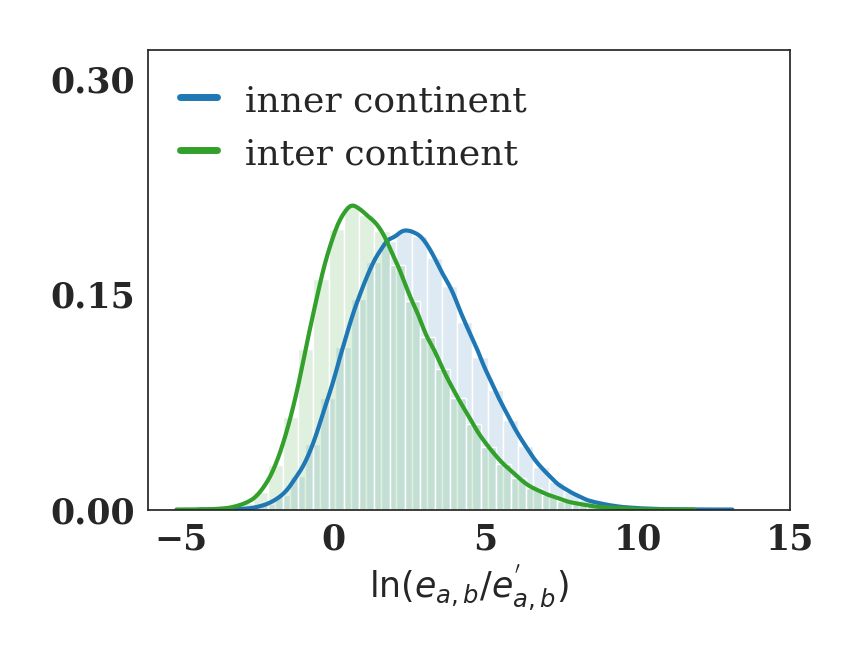

In [9]:
sns.set_theme(style='white')

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times New Roman']  # 可以具体替换
plt.figure(figsize=figsize1, dpi=100)
plt.ylim(0, 0.32)

flag = 'continent'
# plt.ylabel(measures , fontsize = 20)
sns.histplot(x = 'value', kde=True, stat='density',binwidth=0.5, alpha = 0.15,line_kws={'linewidth': 3},
             data = flow_data[flow_data['inner'+flag] == 'inner'],
             color = '#1f78b4',
             label = 'inner '+flag)
sns.histplot(x = 'value', kde=True, stat='density',binwidth=0.5, alpha = 0.15,line_kws={'linewidth': 3},
             data = flow_data[flow_data['inner'+flag] =='inter'],
             color = '#33a02c',
             label = 'inter '+flag)
# plt.legend(loc = 'upper left', fontsize = 20)
plt.xticks( [-5,0,5,10,15], fontsize = 25, weight = 'bold')
plt.yticks([0,0.15,0.30], fontsize = 25, weight = 'bold')
plt.ylabel('', fontsize = 20, weight = 'bold')
plt.xlabel(r"$\ln (e_{a,b} / e_{a,b}^{'})$", fontsize = 25, weight = 'bold')
plt.tight_layout()

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#1f78b4', lw=5, label='inner '+flag),
                   Line2D([0], [0], color='#33a02c', lw=5, label='inter '+flag)]

# 添加图例
plt.legend(handles=legend_elements, loc = 'upper left', fontsize=26)


# plt.savefig('innerinterCityPDF.jpg')